# RF Random Forest
### Using libraries : $\textit{sklearn}$ for time series forecasting

## Imports

In [1]:
from utilities.std_imports import *
import statsmodels.graphics.tsaplots as st
import sklearn.ensemble as se
from sklearn.feature_selection import RFE

## Testing

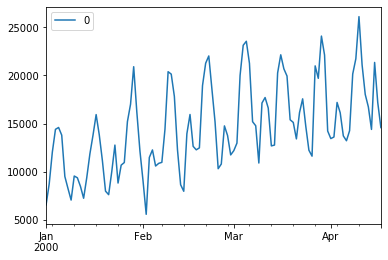

AttributeError: type object 'Series' has no attribute 'from_csv'

In [2]:
# Data
df = pd.read_csv('D:/Data/csv/CarSales.csv', header=0)
vals = np.asarray(df['Sales'])
idx = pd.date_range(pd.to_datetime("2000-01-01"), periods=len(vals)).tolist()
ts = pd.DataFrame(vals)
ts.index = idx
ts.plot()
plt.show()

# Stationarization (seasonality)
diff = ts.diff(12)
diff = diff[12:] # trim empty year
diff.to_csv('seaAdj.csv')
ts = pd.Series.from_csv('seaAdj.csv', header=0)
diff.plot()
plt.show()

# Autocorrelation
st.plot_acf(ts)
plt.show()

# Supervised learning
ts = pd.Series.from_csv('seaAdj.csv', header=0)
df = pd.DataFrame()
for i in range(12,0,-1):
    df['t-'+str(i)] = ts.shift(i)
    df['t'] = ts.values
    print(df.head(13))
df = df[13:]
df.to_csv('lags12.csv', index=False)

# Feature importance
df = pd.read_csv('lags12.csv', header=0)
array = df.values
# split into input and output
X = array[:,0:-1]
y = array[:,-1]
model = se.RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)
print(model.feature_importances_)
names = df.columns.values[0:-1]
ticks = [i for i in range(len(names))]
plt.bar(ticks, model.feature_importances_)
plt.xticks(ticks, names)
plt.show()

# Feature selection of lag variables
df = pd.read_csv('lags12.csv', header=0)
array = df.values
X = array[:,0:-1]
y = array[:,-1]
rfe = RFE(se.RandomForestRegressor(n_estimators=500, random_state=1), 4)
fit = rfe.fit(X, y)
print('Selected Features:')
names = df.columns.values[0:-1]
for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i])
names = df.columns.values[0:-1]
ticks = [i for i in range(len(names))]
plt.bar(ticks, fit.ranking_)
plt.xticks(ticks, names)
plt.show()